# Summary of the Fraud Detection Model
**Model Overview:**

The model is designed to detect fraudulent transactions in a credit card dataset. It is a neural network built using TensorFlow and Keras, which leverages multiple dense (fully connected) layers with ReLU activations and dropout layers to prevent overfitting. The final layer uses a sigmoid activation function to output a probability score between 0 and 1, indicating the likelihood of a transaction being fraudulent. The model is trained using binary cross-entropy loss and the Adam optimizer.

**Dataset Description:**

* The dataset used is the Credit Card Fraud Detection dataset, available on Kaggle. It contains transactions made by credit cards in September 2013 by European cardholders. The dataset includes:

* Time: The seconds elapsed between this transaction and the first transaction in the dataset.

* V1 to V28: The principal components obtained with PCA (Principal Component Analysis), which are anonymized features that have been transformed to protect sensitive information.

* Amount: The transaction amount.

* Class: The target variable, where 1 indicates a fraudulent transaction and 0 indicates a legitimate transaction.

**Data Characteristics:**

* Imbalanced Dataset: The dataset is highly imbalanced, with fraudulent transactions constituting a very small fraction of the total transactions. This characteristic requires careful handling during model evaluation and training to avoid biased results.

* Preprocessing Steps: The data preprocessing includes separating features and the target variable, splitting the data into training, validation, and test sets, and normalizing the features using StandardScaler to ensure all features contribute equally to the model.

**Model Evaluation:**

Given the imbalanced nature of the dataset, evaluation metrics beyond accuracy are crucial:

* Confusion Matrix: Shows true positives, true negatives, false positives, and false negatives, giving a clear picture of the model's performance.

* Precision and Recall: Precision indicates how many of the predicted frauds were actual frauds, while recall indicates how many of the actual frauds were correctly identified by the model.

* F1-Score: The harmonic mean of precision and recall, providing a balance between the two.

* ROC-AUC Score: Measures the area under the receiver operating characteristic curve, summarizing the model's ability to distinguish between the classes at various thresholds.

These metrics help in understanding the model's effectiveness in identifying fraudulent transactions while minimizing false positives and false negatives.

# Set Up the Environment

In [ ]:
!pip install pandas scikit-learn tensorflow


Download and Load the Dataset

In [ ]:
!pip install kaggle


Move the kaggle.json file to the correct location:

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Download the dataset:

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 68% 45.0M/66.0M [00:01<00:00, 28.2MB/s]
100% 66.0M/66.0M [00:01<00:00, 52.5MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


Load the dataset:

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('creditcard.csv')


# Preprocess the Data
Separate features and target:

In [ ]:
X = data.drop('Class', axis=1)
y = data['Class']


Split the data:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


Normalize the data:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Build the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50
6231/6231 [==============================] - 36s 5ms/step - loss: 0.0149 - accuracy: 0.9973 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 2/50
6231/6231 [==============================] - 25s 4ms/step - loss: 0.0053 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 3/50
6231/6231 [==============================] - 26s 4ms/step - loss: 0.0047 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 4/50
6231/6231 [==============================] - 26s 4ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 5/50
6231/6231 [==============================] - 27s 4ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9991
Epoch 6/50
6231/6231 [==============================] - 26s 4ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 7/50
6231/6231 [==============================] - 26s 4ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0043 - val_ac

# Evaluate the Model


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate metrics
print(classification_report(y_test, y_pred_binary))
print(confusion_matrix(y_test, y_pred_binary))


1336/1336 [==============================] - 3s 2ms/step - loss: 0.0038 - accuracy: 0.9996
Test Accuracy: 1.00
1336/1336 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42663
           1       0.92      0.80      0.85        59

    accuracy                           1.00     42722
   macro avg       0.96      0.90      0.93     42722
weighted avg       1.00      1.00      1.00     42722

[[42659     4]
 [   12    47]]


#Key Performance Metrics

When evaluating the performance of a fraud detection model, several key metrics and methods are important to consider due to the imbalanced nature of the dataset (fraudulent transactions are usually a small fraction of the total transactions). Here are the key aspects to focus on:


**1. Accuracy:**

Accuracy is the ratio of correctly predicted instances to the total instances. However, in imbalanced datasets, accuracy alone can be misleading.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")


**2. Confusion Matrix:**

The confusion matrix provides a summary of prediction results on a classification problem. It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_binary)
print(cm)


3. **Precision, Recall, and F1-Score:**

-Precision: The ratio of correctly predicted positive observations to the total predicted positives. Precision is a measure of the model's accuracy in identifying positive instances.

-Recall (Sensitivity): The ratio of correctly predicted positive observations to all observations in the actual class. Recall is a measure of the model's ability to identify all relevant instances.

-F1-Score: The harmonic mean of precision and recall. It provides a balance between precision and recall.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


**4. ROC-AUC Score:**

The ROC-AUC score is the area under the receiver operating characteristic (ROC) curve. It provides an aggregate measure of performance across all classification thresholds.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")


# Additional Evaluation Techniques
**1. Plotting the ROC Curve:**

The ROC curve is a graphical representation of the true positive rate versus the false positive rate at various threshold settings.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


**2. Class Distribution:**

Understanding the class distribution in the dataset is crucial for evaluating the model's performance. In fraud detection, the positive class (fraud) is usually much smaller than the negative class (non-fraud).

In [ ]:
print(y.value_counts())


complete block

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# Use the model

To use the trained model for fraud detection, you'll need to prepare new data in the same way as the training data. This means the new data should have the same features and should be scaled in the same manner. Here's a step-by-step guide on how to use the model with new data:


**Step 1: Prepare New Data**

**Ensure New Data has the Same Features:**
The new data should have the same features as the dataset used for training. Ensure the column names match exactly.

**Normalize the New Data:**
Use the same StandardScaler instance that was used to normalize the training data.

**Step 2:** Load and Preprocess New Data
Assuming you have new data in a DataFrame format:

In [ ]:
import pandas as pd

# Example new data (ensure it has the same structure and columns as the training data)
new_data = pd.read_csv('path_to_new_data.csv')

# Preprocess the new data
# Assuming 'Class' is not present in new_data since it is the target
# Otherwise, drop 'Class' column
new_data_scaled = scaler.transform(new_data)

# Predict with the trained model
predictions = model.predict(new_data_scaled)
predictions_binary = (predictions > 0.5).astype(int)

# Add predictions to the new data
new_data['Predicted_Class'] = predictions_binary
print(new_data.head())


#Example of New Data
Here is an example of how the new data should look like before loading it:

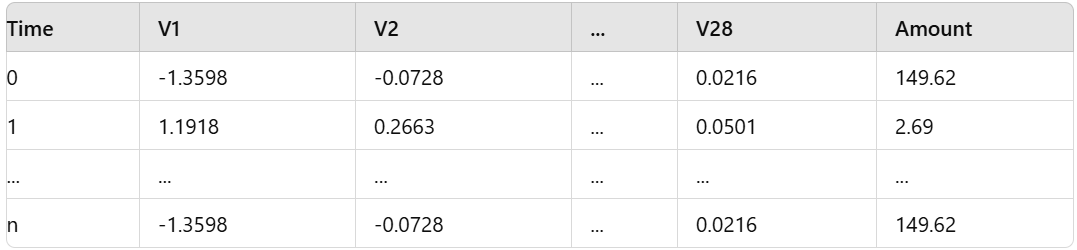

# Full Example

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the new data
new_data = pd.read_csv('path_to_new_data.csv')

# Preprocess the new data
# Assuming 'Class' is not present in new_data since it is the target
# If 'Class' is present, drop it
new_data_scaled = scaler.transform(new_data)

# Predict with the trained model
predictions = model.predict(new_data_scaled)
predictions_binary = (predictions > 0.5).astype(int)

# Add predictions to the new data
new_data['Predicted_Class'] = predictions_binary

# Show the first few rows with predictions
print(new_data.head())


#Using the Model in a Production Environment
**Save the Model:**
You can save the trained model and scaler for later use.

In [ ]:
# Save the model
model.save('fraud_detection_model.h5')

# Save the scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')


**Load the Model and Scaler:**
When you need to use the model again, load it along with the scaler.

In [ ]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model('fraud_detection_model.h5')

# Load the scaler
import joblib
scaler = joblib.load('scaler.pkl')

# Load new data
new_data = pd.read_csv('path_to_new_data.csv')

# Preprocess the new data
new_data_scaled = scaler.transform(new_data)

# Predict with the trained model
predictions = model.predict(new_data_scaled)
predictions_binary = (predictions > 0.5).astype(int)

# Add predictions to the new data
new_data['Predicted_Class'] = predictions_binary

# Show the first few rows with predictions
print(new_data.head())


By following these steps, you can effectively use the trained model to make predictions on new data. Make sure the new data is preprocessed in the same way as the training data to maintain consistency.